Cabin
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: count, Length: 147, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


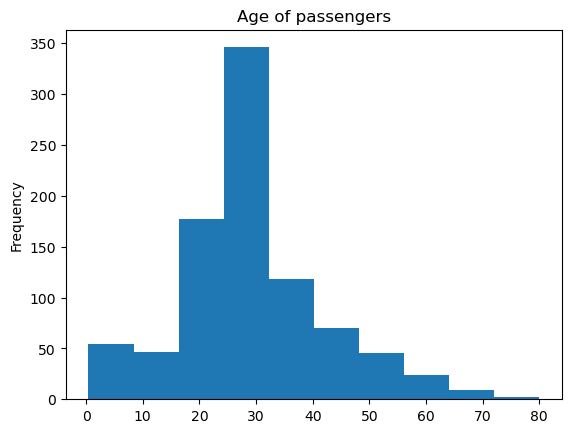

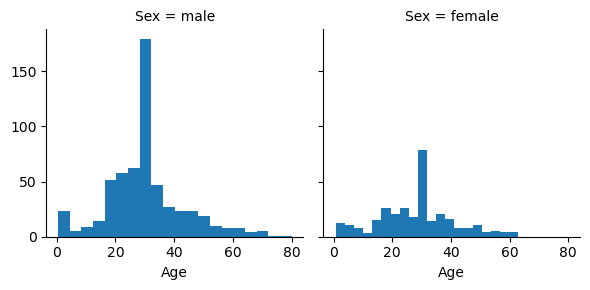

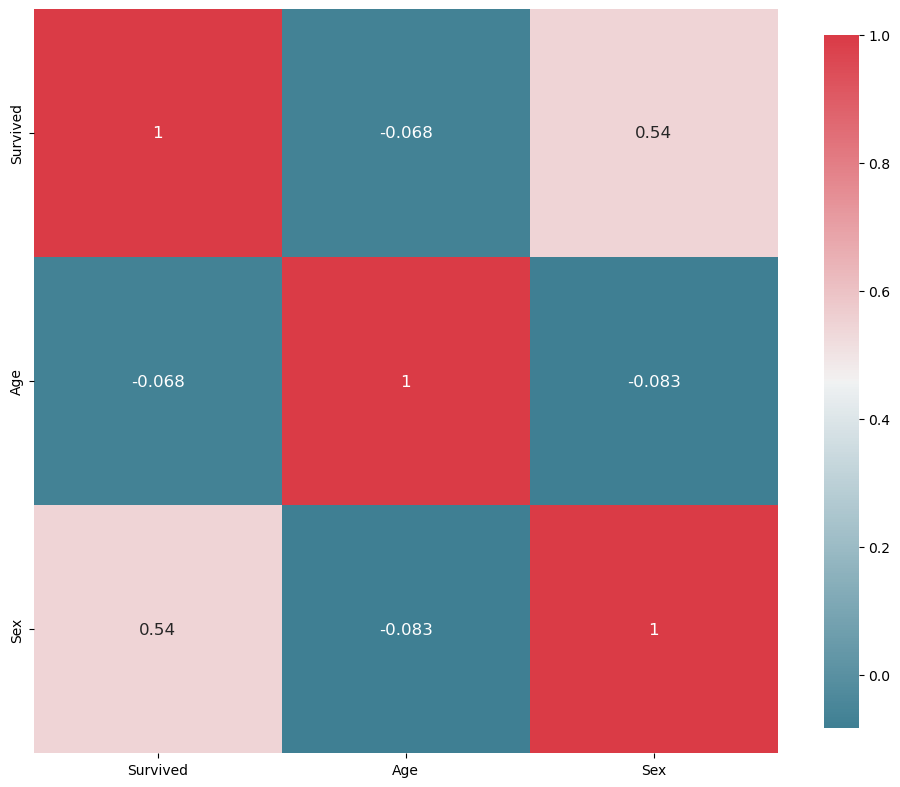

In [1]:
# Importation des bibliothèques nécessaires
import re  # Pour les expressions régulières
import pandas as pd  # Pour la manipulation des données
import matplotlib.pyplot as plt  # Pour la création de graphiques
import seaborn as sns  # Pour des visualisations statistiques
import numpy as np  # Pour les calculs numériques

# Chargement des données depuis un fichier CSV (assurez-vous que le chemin du fichier est correct)
df = pd.read_csv('titanic-passengers.csv', sep=';')

# Afficher les premières lignes du DataFrame pour une inspection initiale
df.head()


# Vérification des valeurs manquantes (NaN) dans le DataFrame
df.isnull().sum()


# Remplissage des valeurs manquantes dans la colonne 'Age' avec la moyenne des âges
df['Age'].fillna(int(df['Age'].mean()), inplace=True)


# Affichage du décompte des valeurs uniques dans la colonne 'Cabin'
print(df['Cabin'].value_counts())

# Remplissage des valeurs manquantes dans la colonne 'Cabin' avec 'G6' la valeur affiché
df['Cabin'].fillna('G6', inplace=True)


# Affichage du décompte des valeurs uniques dans la colonne 'Embarked'
print(df['Embarked'].value_counts())

# Remplissage des valeurs manquantes dans la colonne 'Embarked' avec 'S' la valeur affiché
df['Embarked'].fillna('S', inplace=True)


# Vérification finale des valeurs manquantes après les remplissages
df.isnull().sum()
df.head()

# Définition d'une fonction pour créer une carte de corrélation
def plot_correlation_map(df):
    # Calcul de la matrice de corrélation
    corr = df.corr()
    
    # Création d'une nouvelle figure
    s, ax = plt.subplots(figsize=(12, 10))
    
    # Définition d'une palette de couleurs pour la carte de corrélation
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Création de la carte de corrélation avec des options personnalisées
    s = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink': .9}, ax=ax, annot=True, annot_kws={'fontsize': 12})

# Modification du titre de notre future graphe
plt.title("Age of passengers")
plt.xlabel('Age')

# Création d'un histogramme pour la colonne 'Age'
df['Age'].plot.hist()
# Création d'un FacetGrid pour afficher un histogramme par sexe
g = sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Age', bins=20)
# Remplacement des valeurs de 'Survived' et 'Sex' par des valeurs numériques
df['Survived'] = df['Survived'].replace({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Sélection des colonnes 'Survived', 'Age', et 'Sex'
selected_columns = df[['Survived', 'Age', 'Sex']]
# Appel de la fonction pour créer la carte de corrélation
plot_correlation_map(selected_columns)



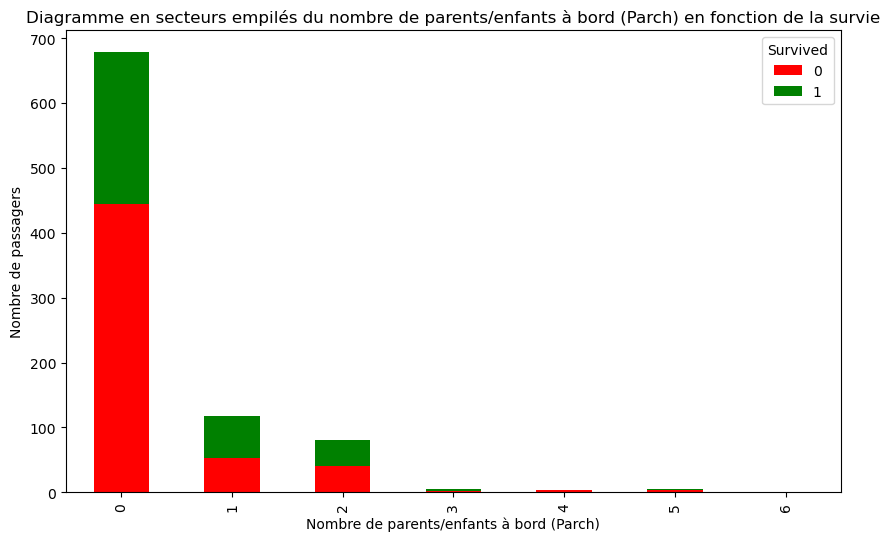

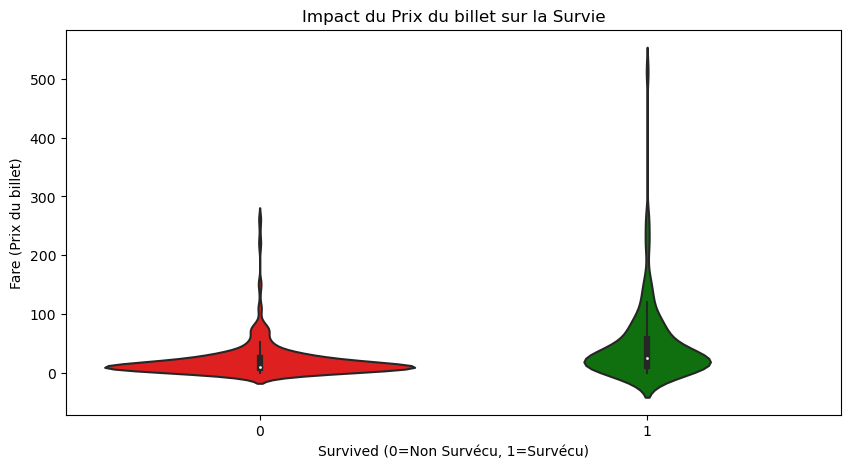

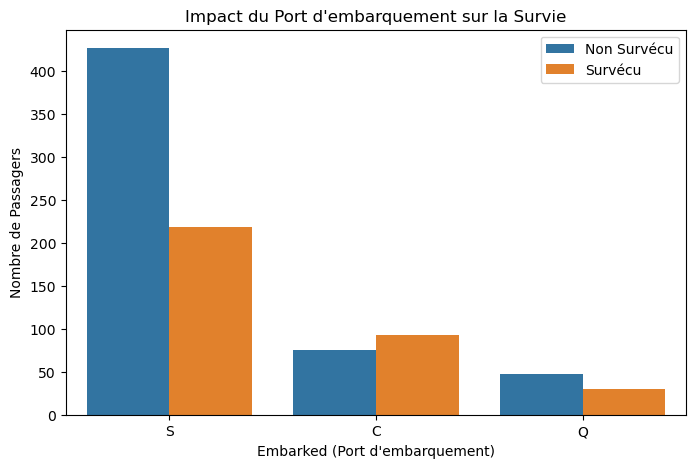

In [2]:
# Regrouper les données par "Parch" et "Survived" et compter les occurrences
parch_survival_counts = df.groupby(['Parch', 'Survived']).size().unstack()

# Créer un diagramme en secteurs empilés
parch_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Ajouter un titre et des étiquettes d'axe
plt.title("Diagramme en secteurs empilés du nombre de parents/enfants à bord (Parch) en fonction de la survie")
plt.xlabel("Nombre de parents/enfants à bord (Parch)")
plt.ylabel("Nombre de passagers")

# Afficher le graphique
plt.show()

# Créer un graphique en violon pour l'impact de Fare (Prix du billet) sur la survie
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Survived', y='Fare', palette={0: 'red', 1: 'green'})
plt.title("Impact du Prix du billet sur la Survie")
plt.xlabel("Survived (0=Non Survécu, 1=Survécu)")
plt.ylabel("Fare (Prix du billet)")
plt.show()

# Analyse de l'impact de Embarked (Port d'embarquement) sur la survie
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Impact du Port d'embarquement sur la Survie")
plt.xlabel("Embarked (Port d'embarquement)")
plt.ylabel("Nombre de Passagers")
plt.legend(labels=['Non Survécu', 'Survécu'])
plt.show() 

<Figure size 800x500 with 0 Axes>

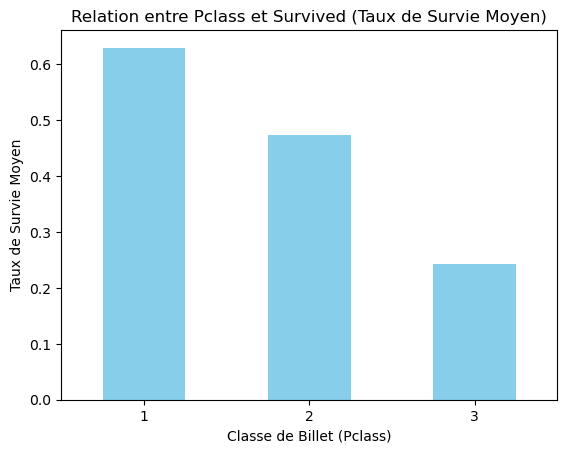

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [3]:

# Sélectionne les colonnes 'Pclass' et 'Survived' et les groupe par 'Pclass', puis calcule la moyenne de 'Survived'
pclass_survival = df[['Pclass', 'Survived']].groupby('Pclass').mean()

# Créer un graphique en barres pour visualiser la relation entre 'Pclass' et 'Survived'
plt.figure(figsize=(8, 5))
pclass_survival.plot(kind='bar', color='skyblue', legend=False)  
plt.title("Relation entre Pclass et Survived (Taux de Survie Moyen)")
plt.xlabel("Classe de Billet (Pclass)")
plt.ylabel("Taux de Survie Moyen")
plt.xticks(rotation=0)
plt.show()
print(pclass_survival)


In [4]:
#création d'un dictionnaire pour la colonne 'Titre'  
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Miss": "Miss",
    "Ms": "Mrs",
    "Mr": "Mrs",
    "Mrs": "Mrs",
    "Master": "Master"
}

# Remplace les valeurs de la colonne 'Name' par les correspondances du dictionnaire 'Title_Dictionary'
df['Name'].replace(Title_Dictionary, inplace=True)


# Créer une nouvelle colonne 'Titre' en extrayant le titre de la colonne 'Name'
df['Titre'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))


# Remplacer les titres par les valeurs du dictionnaire Title_Dictionary
df['Titre'] = df['Titre'].map(Title_Dictionary)

df['Titre']
# Extraire les titres uniques de la colonne 'Titre'
unique_titles = df['Titre'].unique()

# Affiche les titres uniques
print(unique_titles)




['Mrs' 'Miss' 'Officer' 'Royalty' 'Master']


In [5]:
# Crée la fonction FamilySize en additionnant Parch et SibSp
df['FamilySize'] = df['Parch'] + df['SibSp']

# Supprimer la colonne 'Parch'
df = df.drop('Parch', axis=1)
# Supprimer la colonne 'SibSp'
df = df.drop('SibSp', axis=1)

# Supprimer la colonne 'Name'
df = df.drop('Name', axis=1)

# Supprimer la colonne 'Ticket'
df = df.drop('Ticket', axis=1)

# Supprimer la colonne 'Cabin'
df = df.drop('Cabin', axis=1)


C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

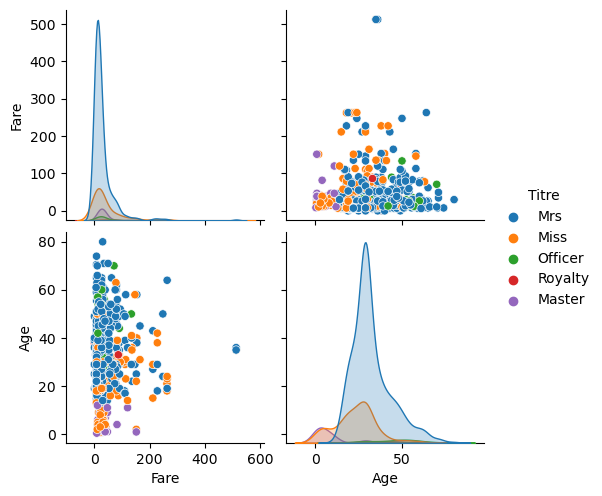

C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

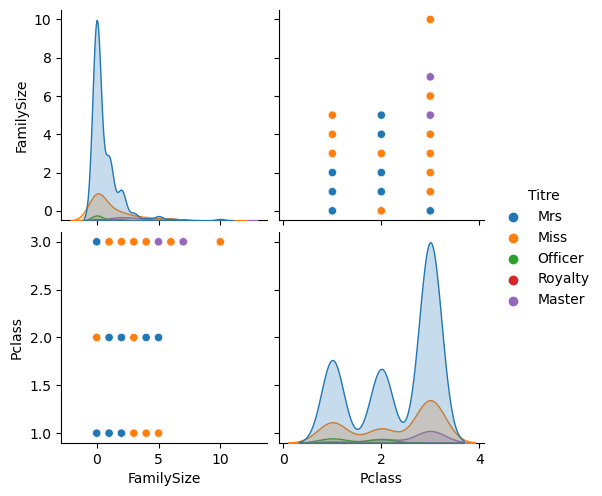

In [6]:
# Sélection des caractéristiques qu'on souhaite inclure dans les graphiques en paires
features_to_plot = [ 'Fare', 'Age', 'Titre' ]
                    
# Sélection d'un sous-ensemble du DataFrame avec ces caractéristiques
pair_df = df[features_to_plot]

# Crée un pair plot avec une taille de figure personnalisée
plt.figure(figsize=(12, 8))
sns.pairplot(pair_df, hue='Titre', diag_kind='kde')


plt.show()

# Sélectionne les caractéristiques qu'on va inclure dans les graphiques en paires
features_to_plot = ['FamilySize','Pclass', 'Titre' ]
                    
# Sélection d'un sous-ensemble du DataFrame avec ces caractéristiques
pair_df = df[features_to_plot]

# Création d'un pair plot avec une taille de figure personnalisée
plt.figure(figsize=(12, 8))
sns.pairplot(pair_df, hue='Titre', diag_kind='kde')
plt.show()

C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


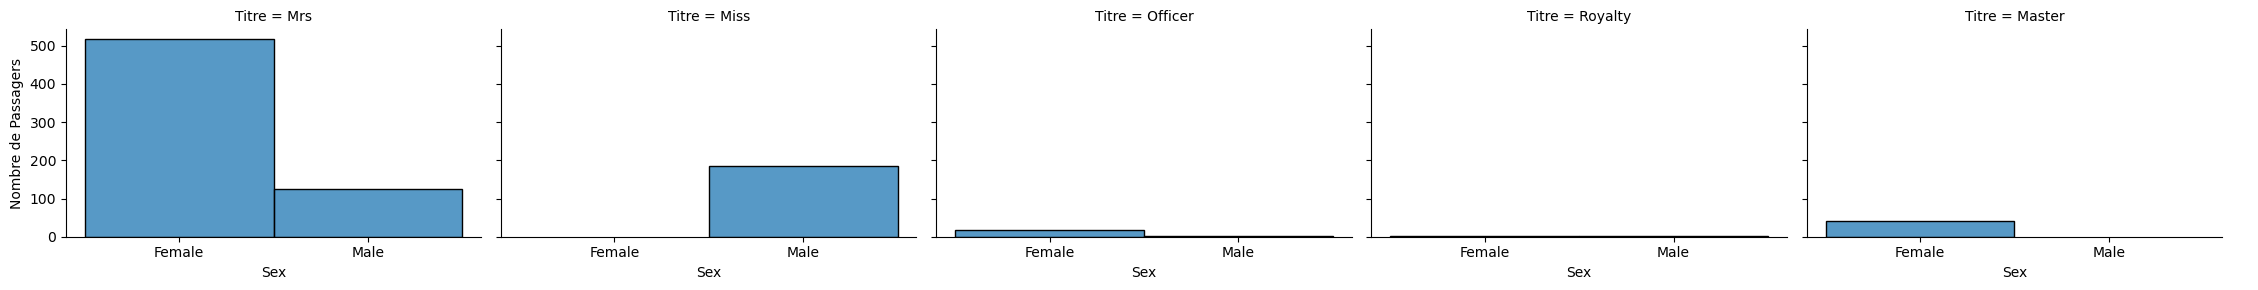

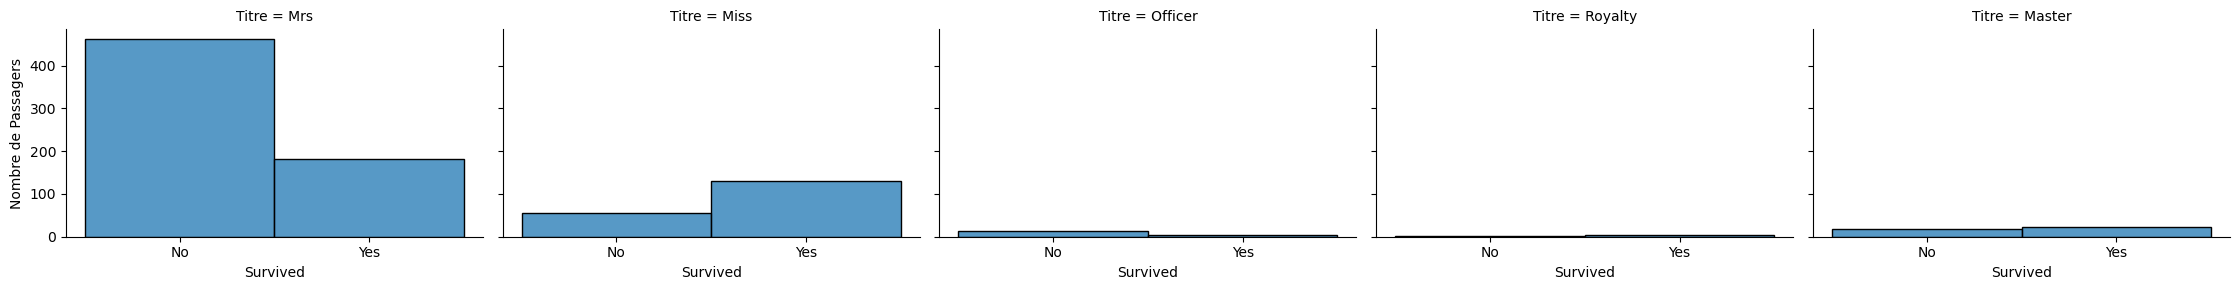

In [7]:
# Remplace les valeurs de la colonne "Sex" et "Survived"
df['Sex'] = df['Sex'].replace({0: 'Female', 1: 'Male'})
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})

    
# Crée un FacetGrid pour diviser les données en fonction du "Titre"
g = sns.FacetGrid(df, col='Titre', height=3, aspect=1.5)

# Trace les histogrammes de "Sex" en fonction de "Titre"
g.map(sns.histplot, 'Sex', kde=False)
g.set_axis_labels('Sex', 'Nombre de Passagers')

# Ajouter une légende
g.add_legend()

# Créer un autre FacetGrid pour diviser les données en fonction du "Titre"
g2 = sns.FacetGrid(df, col='Titre', height=3, aspect=1.5)

# Tracer les histogrammes de "Survived" en fonction de "Titre"
g2.map(sns.histplot, 'Survived', kde=False, bins=2)
g2.set_axis_labels('Survived', 'Nombre de Passagers')



plt.show()   

C:\Users\samy-\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

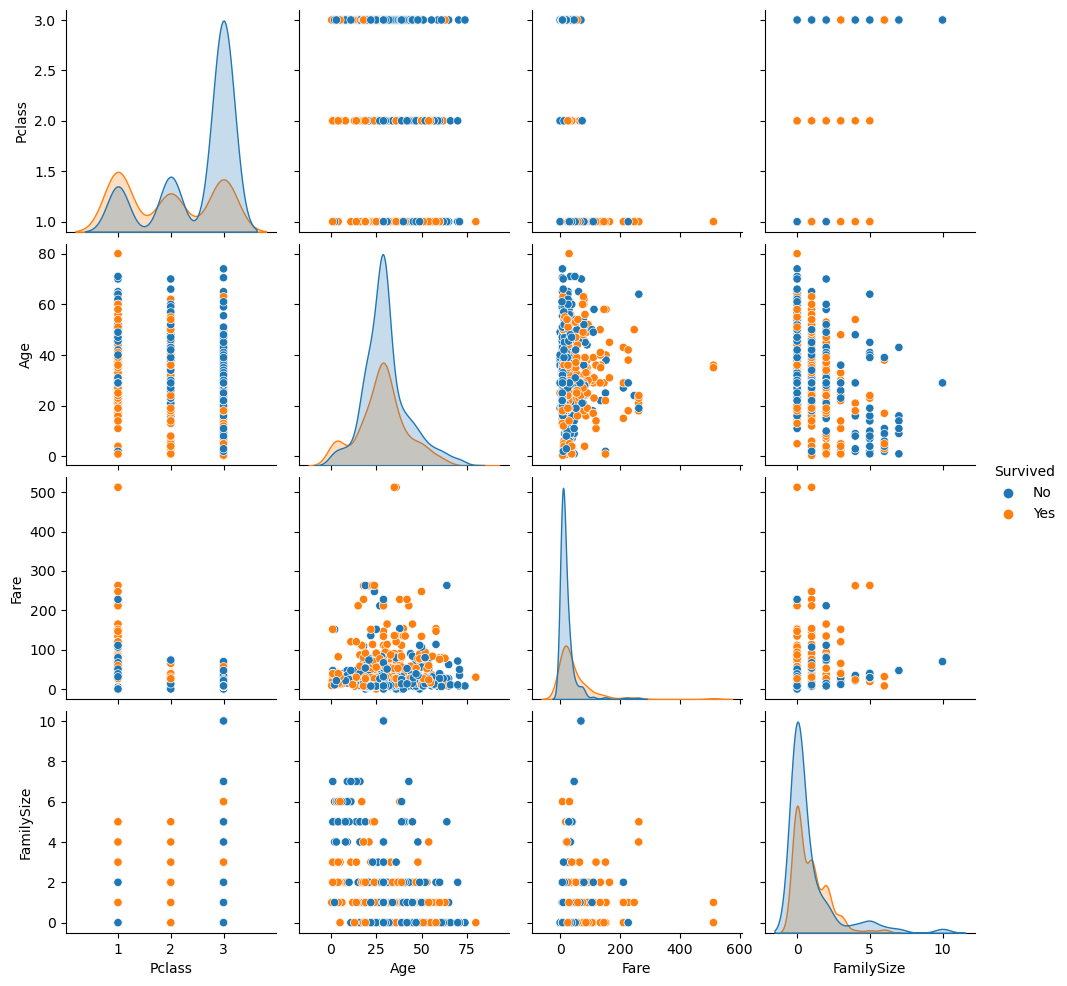

0      Female
1      Female
2      Female
3        Male
4      Female
        ...  
886      Male
887    Female
888      Male
889    Female
890      Male
Name: Sex, Length: 891, dtype: object

In [8]:
# Sélectionne les caractéristiques pour le pair plot
features_to_plot = ['Pclass', 'Sex', 'Age', 'Fare', 'Titre', 'FamilySize', 'Survived']

# Sélectionne un sous-ensemble du DataFrame avec ces caractéristiques
pair_df = df[features_to_plot]

# Crée un pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(pair_df, hue='Survived', diag_kind='kde')
plt.show()
df['Sex']


In [9]:
# Conversion de 'Survived' en valeurs numériques
df['Survived'] = df['Survived'].map({'Yes': 1, 'No': 0})

# Conversion de 'Sex' en valeurs numériques
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

# Groupe par la colonne 'FamilySize' et calculer la moyenne de 'Survived'
family_size_survival = df.groupby('FamilySize')['Survived'].mean()

# Affiche le taux de survie moyen pour différentes tailles de famille
print(family_size_survival)

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [10]:
df


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Titre,FamilySize
0,343,0,2,1,28.0,13.0000,S,Mrs,0
1,76,0,3,1,25.0,7.6500,S,Mrs,0
2,641,0,3,1,20.0,7.8542,S,Mrs,0
3,568,0,3,0,29.0,21.0750,S,Mrs,4
4,672,0,1,1,31.0,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,30.0708,C,Mrs,1
887,61,0,3,1,22.0,7.2292,C,Mrs,0
888,535,0,3,0,30.0,8.6625,S,Miss,0
889,102,0,3,1,29.0,7.8958,S,Mrs,0
